In [1]:
from scipy import stats
from unidecode import unidecode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import dotenv
import warnings
import session_info
import os

In [2]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
# plt.rcParams['figure.figsize'] = (11, 5)

warnings.filterwarnings('ignore')
dotenv.load_dotenv()

True

In [3]:
apartamentos = pd.read_csv('../data/raw/metrocuadrado/venta_apartamentos_bogota.csv')
apartamentos.shape

(11947, 49)

In [4]:
apartamentos .duplicated(subset=['codigo']).sum()

110

In [5]:
apartamentos = apartamentos.drop_duplicates(subset=['codigo'])
apartamentos.shape

(11837, 49)

In [6]:
apartamentos.columns

Index(['precio', 'habitaciones', 'baños', 'estrato', 'codigo', 'barrio',
       'sector', 'antiguedad', 'area_m2', 'administracion', 'parqueaderos',
       'piso', 'amoblado', 'sauna', 'jacuzzi', 'deposito', 'vista_exterior',
       'closets', 'calefaccion', 'estufa', 'vigilancia', 'numero_ascensores',
       'cerca_parque', 'cerca_transporte', 'cerca_centros_comerciales',
       'cerca_colegios_universidades', 'cerca_supermercados',
       'zona_residencial', 'sobre_via_secundaria', 'sobre_via_principal',
       'zc_zonas_verdes', 'zc_salon_comunal', 'zc_gimnasio', 'zc_zonas_bbq',
       'zc_zonas_infantiles', 'zc_cancha_squash', 'acceso_discapacitados',
       'vista_panoramica', 'terraza_balcon', 'area_terraza_balcon', 'terraza',
       'parqueadero_visitantes', 'latitud', 'longitud', 'descripcion',
       'datetime', 'url', 'fuente', 'query'],
      dtype='object')

In [7]:
apartamentos = apartamentos.drop(columns=['url', 'fuente', 'query', 'barrio', 'datetime'])
apartamentos.shape

(11837, 44)

In [8]:
apartamentos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11837 entries, 0 to 11946
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   precio                        11836 non-null  float64
 1   habitaciones                  11834 non-null  float64
 2   baños                         11834 non-null  object 
 3   estrato                       11818 non-null  object 
 4   codigo                        11836 non-null  object 
 5   sector                        11836 non-null  object 
 6   antiguedad                    11829 non-null  object 
 7   area_m2                       11836 non-null  object 
 8   administracion                10623 non-null  float64
 9   parqueaderos                  10618 non-null  float64
 10  piso                          6464 non-null   float64
 11  amoblado                      11837 non-null  int64  
 12  sauna                         11837 non-null  int64  
 13  jacuzz

In [9]:
apartamentos.dropna(subset=['precio'], inplace=True)
apartamentos.shape

(11836, 44)

In [10]:
apartamentos.describe()

precio  habitaciones  administracion  parqueaderos         piso   
count  1.183600e+04  11834.000000    1.062300e+04  10618.000000  6464.000000  \
mean   1.884442e+09      2.750127    4.793477e+06      1.939160     9.482828   
std    4.945896e+10      0.791985    7.896339e+07      0.907344    49.483694   
min    1.100000e+06      1.000000    9.400000e+02      1.000000     0.000000   
25%    3.890000e+08      2.000000    3.100000e+05      1.000000     2.000000   
50%    6.450000e+08      3.000000    5.660000e+05      2.000000     4.000000   
75%    1.250000e+09      3.000000    1.002800e+06      2.000000     6.000000   
max    3.000000e+12      5.000000    3.800000e+09      4.000000   999.000000   

           amoblado         sauna       jacuzzi     deposito  vista_exterior   
count  11836.000000  11836.000000  11836.000000  4836.000000    11836.000000  \
mean       0.062183      0.093782      0.046637     0.863730        0.223724   
std        0.241498      0.291537      0.210870     0.421549        0.416757   
min        0.000000      0.000000      0.000000     0.000000        0.000000   
25%        0.000000      0.000000      0.000000     1.000000        0.000000   
50%        0.000000      0.000000      0.000000     1.000000        0.000000   
75%        0.000000      0.000000      0.000000     1.000000        0.000000   
max        1.000000      1.000000      1.000000     3.000000        1.000000   

       ...   zc_gimnasio  zc_zonas_bbq  zc_zonas_infantiles  zc_cancha_squash   
count  ...  11836.000000  11836.000000         11836.000000      11836.000000  \
mean   ...      0.286583      0.226512             0.339980          0.071730   
std    ...      0.452184      0.418592             0.473722          0.258052   
min    ...      0.000000      0.000000             0.000000          0.000000   
25%    ...      0.000000      0.000000             0.000000          0.000000   
50%    ...      0.000000      0.000000             0.000000          0.000000   
75%    ...      1.000000      0.000000             1.000000          0.000000   
max    ...      1.000000      1.000000             1.000000          1.000000   

       acceso_discapacitados  vista_panoramica       terraza   
count           11836.000000      11836.000000  11836.000000  \
mean                0.141686          0.215444      0.127492   
std                 0.348743          0.411148      0.333538   
min                 0.000000          0.000000      0.000000   
25%                 0.000000          0.000000      0.000000   
50%                 0.000000          0.000000      0.000000   
75%                 0.000000          0.000000      0.000000   
max                 1.000000          1.000000      1.000000   

       parqueadero_visitantes       latitud      longitud  
count            11836.000000  11830.000000  11830.000000  
mean                 0.314126      4.609791    -72.649752  
std                  0.464187      0.864589     10.189102  
min                  0.000000      0.000000   -122.861380  
25%                  0.000000      4.660000    -74.069997  
50%                  0.000000      4.690000    -74.052000  
75%                  1.000000      4.715000    -74.042595  
max                  1.000000     49.369297     39.987630  

[8 rows x 32 columns]

In [11]:
z_scores = np.abs(stats.zscore(apartamentos['precio']))
threshold = 3

outliers = np.where(z_scores > threshold)
outliers[0]

array([ 9383,  9943, 11044, 11804], dtype=int64)

In [12]:
apartamentos.iloc[outliers]

precio  habitaciones baños estrato          codigo sector   
9462   2.200000e+12           3.0     5       6  14383-M3769764  CHICÓ  \
10022  2.700000e+12           3.0     5       6    771-M4371218  CHICÓ   
11130  2.800000e+12           4.0     5       6  11974-M3874850  CHICÓ   
11915  3.000000e+12           3.0     5       6   3252-M2141825  CHICÓ   

               antiguedad  area_m2  administracion  parqueaderos  ...   
9462   Entre 10 y 20 años     250        1700000.0           3.0  ...  \
10022      Más de 20 años     302        1900000.0           2.0  ...   
11130  Entre 10 y 20 años  292.43        2000000.0           4.0  ...   
11915   Entre 5 y 10 años     326        1000000.0           4.0  ...   

       zc_cancha_squash  acceso_discapacitados  vista_panoramica   
9462                  0                      1                 1  \
10022                 0                      0                 1   
11130                 0                      0                 0   
11915                 0                      1                 1   

       terraza_balcon  area_terraza_balcon  terraza parqueadero_visitantes   
9462          terraza                  50         0                      0  \
10022             NaN                  NaN        0                      1   
11130             NaN                  NaN        0                      0   
11915         terraza                 160         0                      0   

        latitud   longitud                                        descripcion  
9462   4.657795 -74.050120  Lindo apartamento en Rosales, 250 mts, 50 mts2...  
10022  4.576000 -74.160000  Apto en venta, Bella Vista 302m2, piso 201, re...  
11130  4.678509 -74.040016  Hermoso apartamento en Chicó reservado. Esta d...  
11915  4.676917 -74.042015  LINDO APARTAMENTO DUPLEX CON USO EXCLUSIVO DE ...  

[4 rows x 44 columns]

In [13]:
def normalize_string(text):
    return unidecode(text.upper())

In [14]:
apartamentos['sector'] = apartamentos['sector'].apply(normalize_string)

In [17]:
fig = px.scatter_mapbox(
    apartamentos.iloc[outliers],
    lat='latitud', 
    lon='longitud', 
    color='precio', 
    zoom=10, 
    height=500,
    hover_name='antiguedad',
    hover_data=['area_m2', 'habitaciones', 'sector'],
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Apartamentos con precios atípicos'
)

fig.update_layout(
    mapbox=dict(
        accesstoken=os.getenv('MAPBOX_TOKEN'),
        style='dark',
        center=dict(
            lat=4.60971,
            lon=-74.08175
        )
    )
)

fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()

In [18]:
fig = px.scatter_mapbox(
    apartamentos.loc[apartamentos['precio'] < 4e9],
    lat='latitud', 
    lon='longitud', 
    color='precio', 
    zoom=10, 
    height=500,
    hover_name='estrato',
    hover_data=['area_m2', 'habitaciones', 'antiguedad', 'sector'],
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.update_layout(
    mapbox=dict(
        accesstoken=os.getenv('MAPBOX_TOKEN'),
        style='dark',
        center=dict(
            lat=4.60971,
            lon=-74.08175
        )
    )
)

fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()

In [19]:
apartamentos.habitaciones.unique()

array([ 3.,  2.,  1.,  4.,  5., nan])

In [22]:
apartamentos.baños.unique()

array(['3', '2', '4', '5', '1', nan], dtype=object)

In [21]:
apartamentos.loc[apartamentos['baños'] == '6\r\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '5\r\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '4\r\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '3\r\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '2\r\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '5\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '3\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '6\nE', 'baños'] = np.nan

In [25]:
apartamentos.estrato.unique()

array(['6', '5', '3', '4', '2', '1', nan, '4.0', '3.0', '5.0', '6.0',
       '1.0'], dtype=object)

In [24]:
apartamentos.loc[apartamentos['estrato'] == '3\r\nParq', 'estrato'] = np.nan
apartamentos.loc[apartamentos['estrato'] == '2\r\nParq', 'estrato'] = np.nan
apartamentos.loc[apartamentos['estrato'] == '1\r\nParq', 'estrato'] = np.nan
apartamentos.loc[apartamentos['estrato'] == '3\nParq', 'estrato'] = np.nan
apartamentos.loc[apartamentos['estrato'] == '2\nParq', 'estrato'] = np.nan
apartamentos.loc[apartamentos['estrato'] == 'Comercial', 'estrato'] = np.nan

In [26]:
apartamentos.estrato = pd.to_numeric(apartamentos.estrato, errors='coerce')

In [27]:
apartamentos.estrato.unique()

array([ 6.,  5.,  3.,  4.,  2.,  1., nan])

In [28]:
apartamentos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11836 entries, 0 to 11946
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   precio                        11836 non-null  float64
 1   habitaciones                  11834 non-null  float64
 2   baños                         11820 non-null  object 
 3   estrato                       11806 non-null  float64
 4   codigo                        11836 non-null  object 
 5   sector                        11836 non-null  object 
 6   antiguedad                    11829 non-null  object 
 7   area_m2                       11836 non-null  object 
 8   administracion                10623 non-null  float64
 9   parqueaderos                  10618 non-null  float64
 10  piso                          6464 non-null   float64
 11  amoblado                      11836 non-null  int64  
 12  sauna                         11836 non-null  int64  
 13  jacuzz

### Administracion

In [30]:
apartamentos.administracion.describe()

count    1.062300e+04
mean     4.793477e+06
std      7.896339e+07
min      9.400000e+02
25%      3.100000e+05
50%      5.660000e+05
75%      1.002800e+06
max      3.800000e+09
Name: administracion, dtype: float64

In [36]:
apartamentos.to_csv('../data/interim/metrocuadrado/venta_apartamentos_bogota.csv', index=False)

In [37]:
imagenes = pd.read_csv('../data/raw/metrocuadrado/venta_apartamentos_bogota_imagenes.csv')
imagenes.shape

(413452, 2)

In [38]:
imagenes.columns

Index(['codigo', 'url'], dtype='object')

In [39]:
imagenes.duplicated(subset=['url']).sum()

232999

In [40]:
imagenes.drop_duplicates(subset=['url'], inplace=True)

In [41]:
imagenes.shape

(180453, 2)

In [42]:
imagenes.head(3)

codigo                                                url
0  10677-M3878516  https://multimedia.metrocuadrado.com/10677-M38...
1  10677-M3878516  https://multimedia.metrocuadrado.com/10677-M38...
2  10677-M3878516  https://multimedia.metrocuadrado.com/10677-M38...

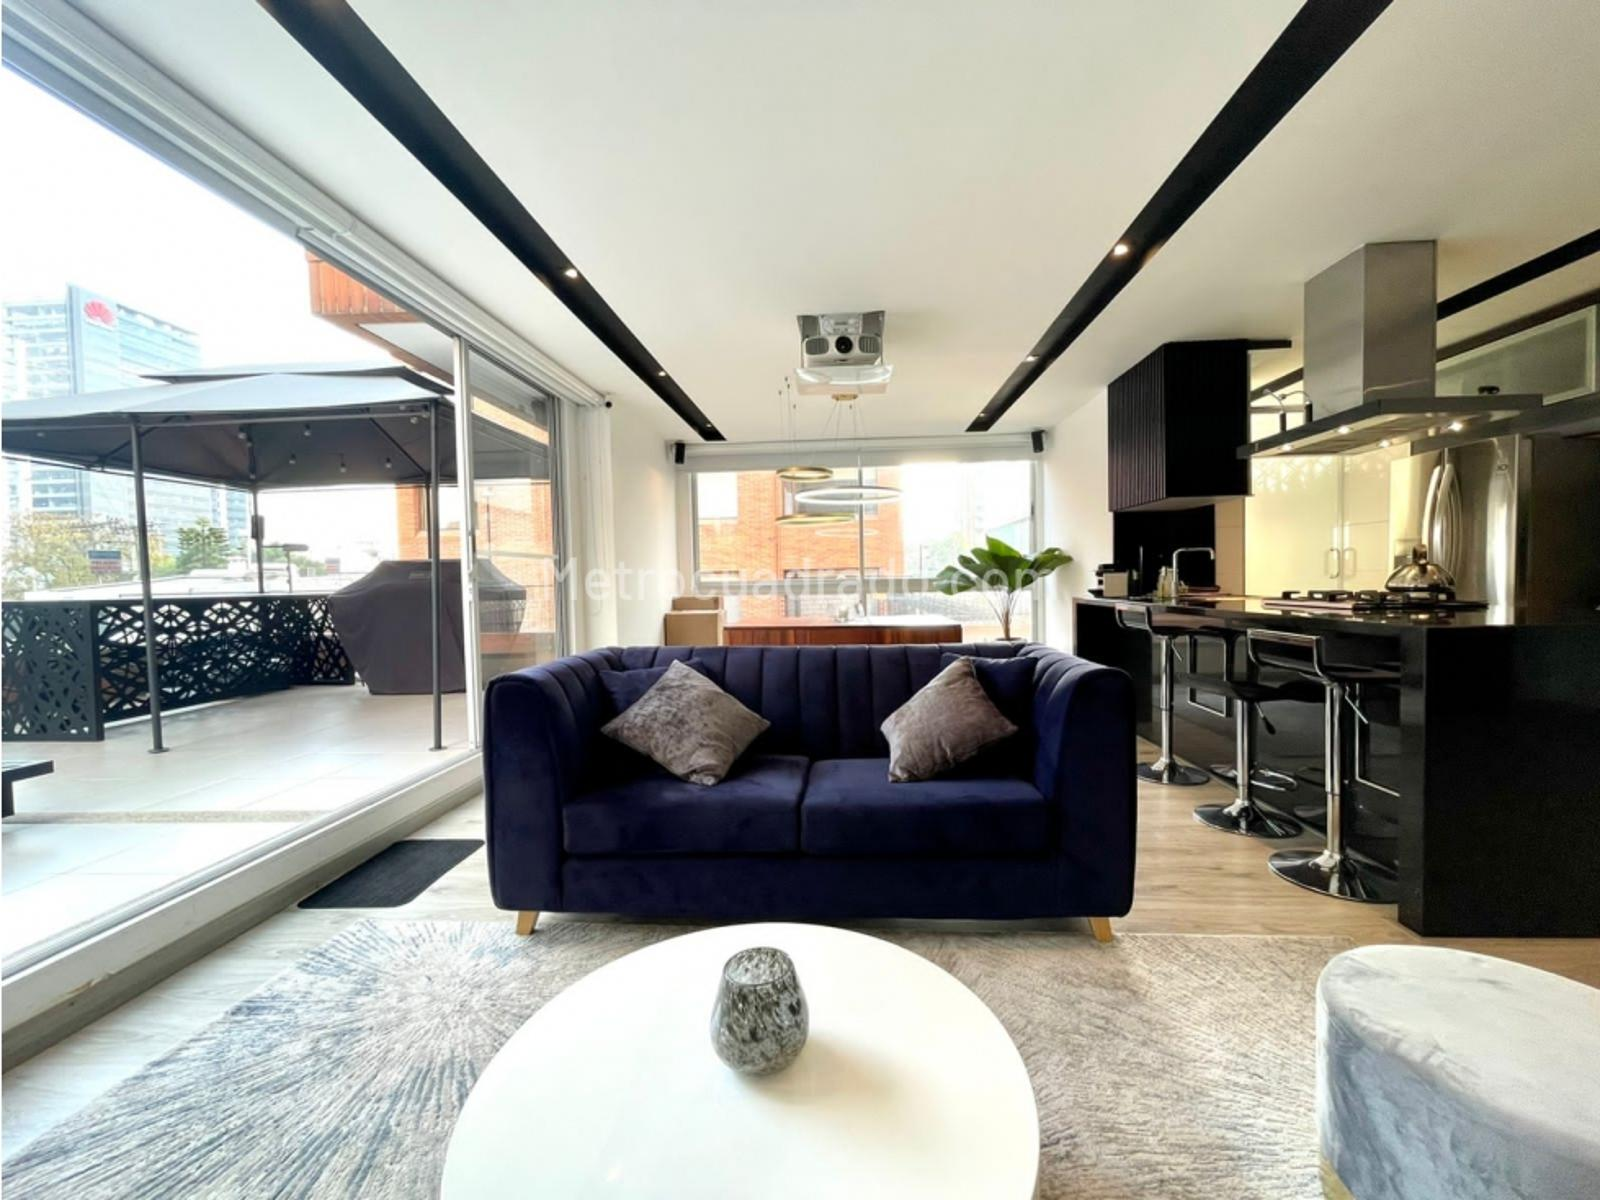

In [48]:
from PIL import Image
from io import BytesIO
import requests

response = requests.get(imagenes.iloc[433]['url'])

img = Image.open(BytesIO(response.content))

img

In [44]:
imagenes.to_csv('../data/processed/metrocuadrado/venta_apartamentos_bogota_imagenes.csv', index=False)   

In [49]:
session_info.show()